# Symulator parametrów obwodowych obwodu ze sprzężeniem indukcyjnym

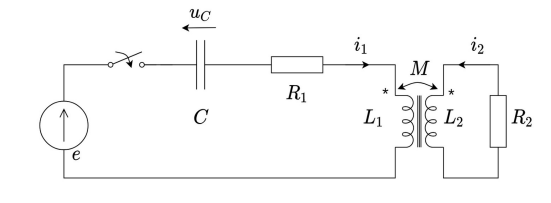

Wartość początkowa zmiennych stanu: <br />
* i1 = 0 [A]<br />
* i2 = 0 [A]<br />
* uc = 0 [V]<br />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Część 1.

0 < t < 30 s

In [2]:
#Definicja zmiennych
h = 0.08
t1 = 30
t = np.arange(0,t1,h)
y = np.array([[0],[0],[0]])
e1 = [120 if x%3<1.5 else 0 for x in np.arange(0,30,h)]
e2 = np.sin(t)
e3 = 210*np.sin(2*np.pi*5*t)
e4 = 120*np.sin(2*np.pi*50*t)

In [3]:
#podstawiamy i1=y1, i2=y2, uc=y3

def dy(y,index,e):
    R1 = 0.09
    R2 = 10
    C = 0.5
    L1 = 3
    L2 = 5
    M = 0.8
    D1 = L1/M - M/L2
    D2 = M/L1 - L2/M
    
    matrix1 = np.matmul(np.array([[-R1/(M*D1), R2/(L2*D1), -1/(M*D1)],[-R1/(L1*D2), R2/(M*D2), -1/(L1*D2)],[1/C, 0, 0]]),y)
    matrix1 = np.swapaxes([matrix1],0,1)
    matrix2 = np.array([[1/(M*D1)],[1/(L1*D2)],[0]])*e[index]
    
    return matrix1+matrix2

In [4]:
#metoda eulera
def euler(a,h,e):
    y = np.array([[0],[0],[0]])
    Xi = a+t*h
    for index in range(len(t)-1):
        y = np.append(y,(np.swapaxes([y[:,index]],0,1)+ h*dy(y[:,index],index,e)),axis=1)
    return y

#ulepszona metoda eulera
def improved_euler(a,h,e):
    y = np.array([[0],[0],[0]])
    Xi = a+t*h
    for index in range(len(t)-1):
        y = np.append(y,(np.swapaxes([y[:,index]],0,1) + h*dy(y[:,index] + (h/2)*(y[:,index]),index,e)),axis=1)
    return y

In [5]:
#funkcje rysujące wykresy
def current_euler(e):
    a=euler(0,h,e)
    b =a[0,:]
    c = a[1,:]
    plt.plot(t,b,t,c)
    plt.title('Metoda eulera')
    plt.xlabel('t(s)')
    plt.ylabel('I(A)', rotation='horizontal')
    plt.legend(['i1','i2'])
    plt.show()

def current_improved_euler(e):
    a=improved_euler(0,h,e)
    b =a[0,:]
    c = a[1,:]
    plt.plot(t,b,t,c)
    plt.title('Ulepszona metoda eulera')
    plt.xlabel('t(s)')
    plt.ylabel('I(A)', rotation='horizontal')
    plt.legend(['i1','i2'])
    plt.show()
    
def voltage_euler(e):
    a =euler(0,h,e)[2,:]
    plt.plot(t,e,t,a)
    plt.title('Metoda Eulera')
    plt.xlabel('t(s)')
    plt.ylabel('U(V)', rotation='horizontal')
    plt.legend(['e','uc'])
    plt.show()

def voltage_improved_euler(e):
    a =improved_euler(0,h,e)[2,:]
    plt.plot(t,e,t,a)
    plt.title('Ulepszona metoda Eulera')
    plt.xlabel('t(s)')
    plt.ylabel('U(V)', rotation='horizontal')
    plt.legend(['e','uc'])
    plt.show()

## Wykresy przebiegów

e = 120 dla t < T/2 <br />
e = 0 dla t >= T/2<br />
T=3[s]

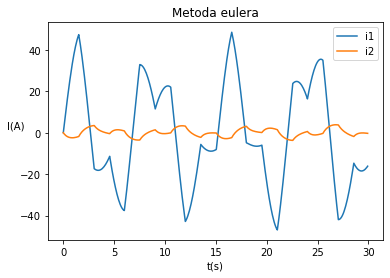

In [6]:
current_euler(e1)

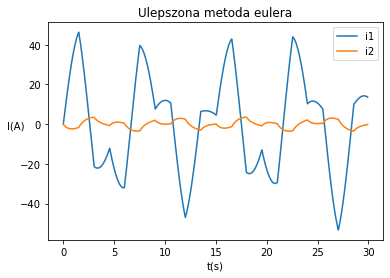

In [7]:
current_improved_euler(e1)

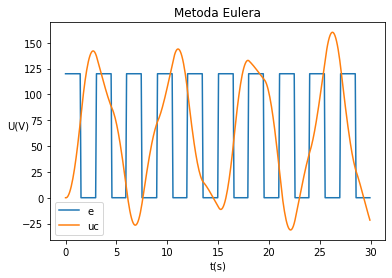

In [8]:
voltage_euler(e1)

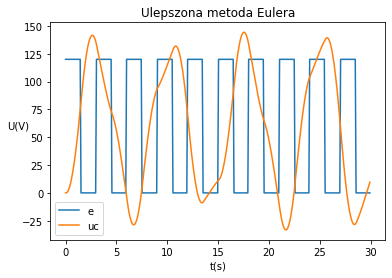

In [9]:
voltage_improved_euler(e1)

### e(t) = 240sin(t)

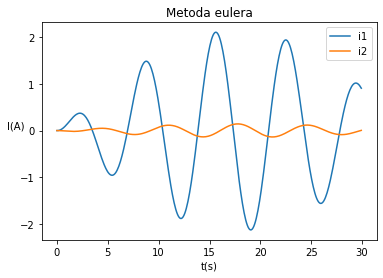

In [10]:
current_euler(e2)

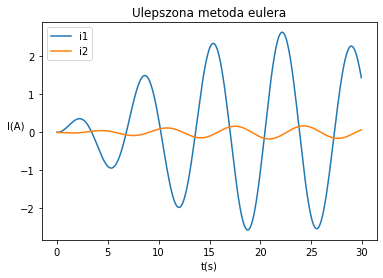

In [11]:
current_improved_euler(e2)

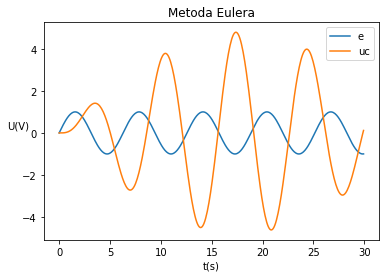

In [12]:
voltage_euler(e2)

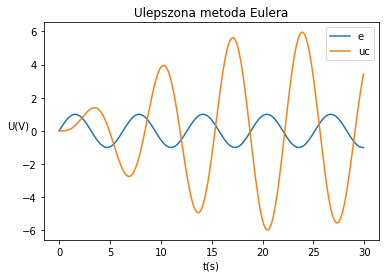

In [13]:
voltage_improved_euler(e2)

### e(t) = 210sin(2πft), dla f = 5 Hz

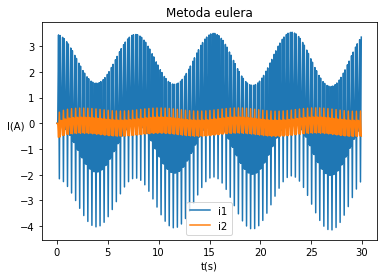

In [14]:
current_euler(e3)

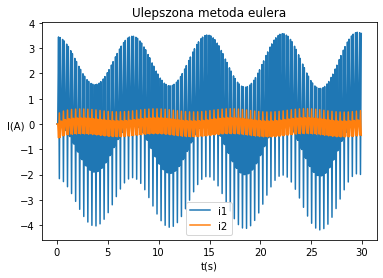

In [15]:
current_improved_euler(e3)

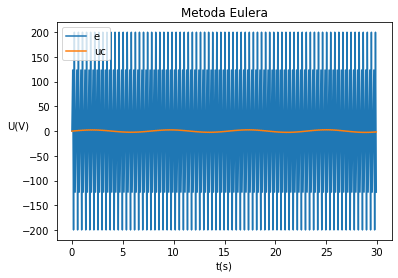

In [16]:
voltage_euler(e3)

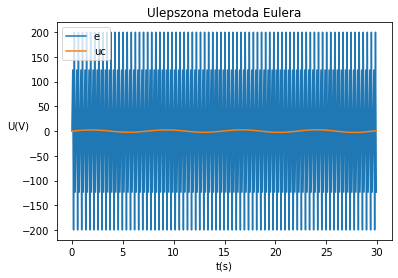

In [17]:
voltage_improved_euler(e3)

### e(t) = 120sin(2πft), dla f = 50 Hz

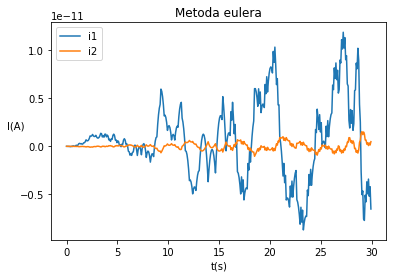

In [18]:
current_euler(e4)

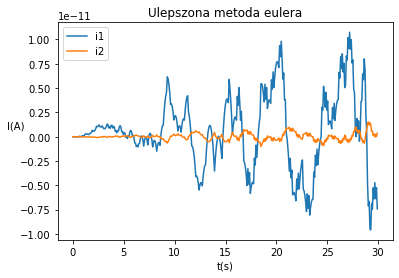

In [19]:
current_improved_euler(e4)

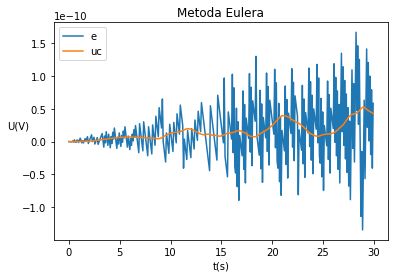

In [20]:
voltage_euler(e4)

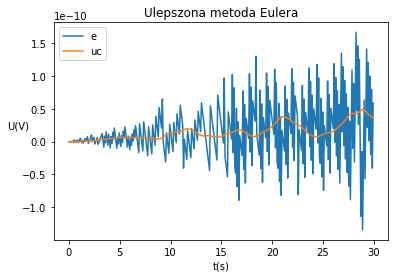

In [21]:
voltage_improved_euler(e4)

## Część 2
założenie, że sprzężenie między obwodami pierwotnym i wtórnym jest nieliniowe i uzależnione od napięcia na indukcyjności

Text(0, 0.5, 'M [H]')

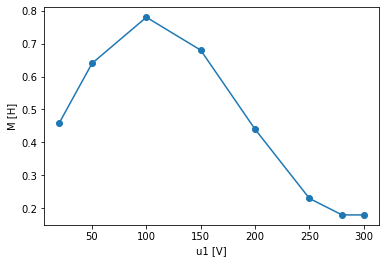

In [73]:
# uL1j = y[0] Mj = y[1]

y = np.array([[20,50,100,150,200,250,280,300],[0.46,0.64,0.78, 0.68, 0.44, 0.23, 0.18,0.18]])
plt.plot(y[0],y[1])
plt.scatter(y[0],y[1])
plt.xlabel('u1 [V]')
plt.ylabel('M [H]')

### interpolacja wielomianowa

In [116]:
def interpolation(y):
    n = len(y[0])-1
    matrix = np.zeros((n+1,n))
    matrix[:,0]=y[0]
    matrix[:,1]=y[1]
    for j in range(2,n):
        for i in range(j-1,n-1):
            matrix[i][j] = (matrix[i][j-1] - matrix[i-1][j-1])/(matrix[i][0]-matrix[i-j+1][0])
    return matrix

In [115]:
newton_interpolation(y)

array([[ 2.00000000e+01,  4.60000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.00000000e+01,  6.40000000e-01,  6.00000000e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+02,  7.80000000e-01,  2.80000000e-03,
        -4.00000000e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.50000000e+02,  6.80000000e-01, -2.00000000e-03,
        -4.80000000e-05, -6.15384615e-08,  0.00000000e+00,
         0.00000000e+00],
       [ 2.00000000e+02,  4.40000000e-01, -4.80000000e-03,
        -2.80000000e-05,  1.33333333e-07,  1.08262108e-09,
         0.00000000e+00],
       [ 2.50000000e+02,  2.30000000e-01, -4.20000000e-03,
         6.00000000e-06,  2.26666667e-07,  4.66666667e-10,
        -2.67806268e-12],
       [ 2.80000000e+02,  1.80000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0000000